# <span style="color:green"> Numerical Simulation Laboratory </span>
## <span style="color:brown"> Python Exercise 11 </span>
## <span style="color:orange"> Keras - Neural Network regression </span>

### Overview 

In this notebook our task will be to perform machine learning regression on noisy data with a Neural Network (NN).

We will explore how the ability to fit depends on the structure of the NN. The goal is also to build intuition about why prediction is difficult.

### The Prediction Problem

Consider a probabilistic process that gives rise to labeled data $(x,y)$. The data is generated by drawing samples from the equation

$$
    y_i= f(x_i) + \eta_i,
$$

where $f(x_i)$ is some fixed, but (possibly unknown) function, and $\eta_i$ is a Gaussian, uncorrelate noise variable such that

$$
\langle \eta_i \rangle=0 \\
\langle \eta_i \eta_j \rangle = \delta_{ij} \sigma
$$

We will refer to the $f(x_i)$ as the **true features** used to generate the data. 

To make predictions, we will consider a NN that depends on its parameters, weights and biases. The functions that the NN can model respresent the **model class** that we are using to try to model the data and make predictions.

To learn the parameters of the NN, we will train our models on a **training data set** and then test the effectiveness of the NN on a *different* dataset, the **validation data set**. The reason we must divide our data into a training and test dataset is that the point of machine learning is to make accurate predictions about new data we have not seen.

To measure our ability to predict, we will learn our parameters by fitting our training dataset and then making predictions on our test data set. One common measure of predictive  performance of our algorithm is to compare the predictions,$\{y_j^\mathrm{pred}\}$, to the true values $\{y_j\}$. A commonly employed measure for this is the sum of the mean square-error (MSE) on the test set:
$$
MSE= \frac{1}{N_\mathrm{test}}\sum_{j=1}^{N_\mathrm{test}} (y_j^\mathrm{pred}-y_j)^2
$$

We will try to get a qualitative picture by examining plots on validation and training data.

### Linear fit

We start by considering the very simple case:
$$
f(x)=2x+1
$$

Let's start defining the parameters of an ideal linear function which we are going to predict through a neural network regression

In [40]:
# target parameters of f(x) = m*x + b
m = 2 # slope
b = 1 # intersect

Now let's generate a set of input data which will slightly deviate from our ideal behaviour using a random noise (that actually is set to zero):

In [332]:
import numpy as np

# generate training inputs
np.random.seed(0)
x_train = np.random.uniform(-1, 1, 700)
x_valid = np.random.uniform(-1, 1, 50)
x_valid.sort()
y_target = m * x_valid + b # ideal (target) linear function

sigma = 1 # noise standard deviation, for the moment it is absent
y_train = np.random.normal(m * x_train + b, sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(m * x_valid + b, sigma)

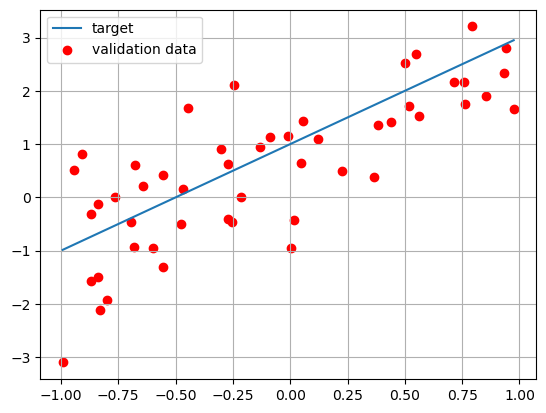

In [333]:
# plot validation and target dataset
import matplotlib.pyplot as plt
plt.plot(x_valid, y_target, label='target')
plt.scatter(x_valid, y_valid, color='r', label='validation data')
plt.legend()
plt.grid(True)
plt.show()

If you remember how a single node of a neural network works, you can easily spot that **just a single neuron can make the job**. So let's start using a simple Sequential model with just one layer on one neuron only!

In [334]:
# compose the NN model
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

model = tf.keras.Sequential()
model.add(Dense(1, input_shape=(1,)))

# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

In [335]:
# get a summary of our composed model
model.summary()

Model: "sequential_39"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_39 (Dense)            (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


We are now going to train our model, that is we feed the neuron with the set of training pair x, y_train from which the optimizer will find the best weights to minimize the Mean Square Error loss function (out linear regression function).

In [336]:
# fit the model using training dataset
# over 10 epochs of 32 batch size each
# report training progress against validation data
history = model.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=40,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))

Epoch 1/40
22/22 [==============================] - 0s 6ms/step - loss: 3.5035 - mse: 3.5035 - val_loss: 2.1061 - val_mse: 2.1061
Epoch 2/40
22/22 [==============================] - 0s 2ms/step - loss: 2.6283 - mse: 2.6283 - val_loss: 1.6827 - val_mse: 1.6827
Epoch 3/40
22/22 [==============================] - 0s 2ms/step - loss: 2.0982 - mse: 2.0982 - val_loss: 1.4183 - val_mse: 1.4183
Epoch 4/40
22/22 [==============================] - 0s 2ms/step - loss: 1.7582 - mse: 1.7582 - val_loss: 1.2385 - val_mse: 1.2385
Epoch 5/40
22/22 [==============================] - 0s 2ms/step - loss: 1.5265 - mse: 1.5265 - val_loss: 1.1117 - val_mse: 1.1117
Epoch 6/40
22/22 [==============================] - 0s 2ms/step - loss: 1.3656 - mse: 1.3656 - val_loss: 1.0192 - val_mse: 1.0192
Epoch 7/40
22/22 [==============================] - 0s 3ms/step - loss: 1.2489 - mse: 1.2489 - val_loss: 0.9522 - val_mse: 0.9522
Epoch 8/40
22/22 [==============================] - 0s 2ms/step - loss: 1.1646 - mse: 1.16

By looking at weights and biases we can see if the linear fit was successfull: $w_1$ represents the angular coefficient, $b$ the intercept.

In [337]:
# return weights and biases
model.get_weights()

[array([[2.0705495]], dtype=float32), array([1.0014518], dtype=float32)]

In [338]:
# evaluate model
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

2/2 [==============================] - 0s 3ms/step - loss: 0.8272 - mse: 0.8272

Test loss: 0.8272273540496826
Test accuracy: 0.8272273540496826


In [1]:
# evaluate model with the exact curve
score = model.evaluate(x_valid, y_target, batch_size=32, verbose=1)

# print performance
print()
print('Target loss:', score[0])
print('Target accuracy:', score[1])

NameError: name 'model' is not defined

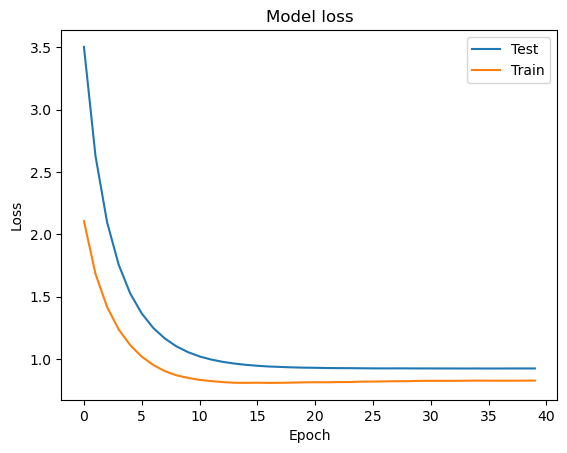

In [340]:
# look into training history
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Test', 'Train'], loc='best')
plt.show()

4/4 [==============================] - 0s 1ms/step


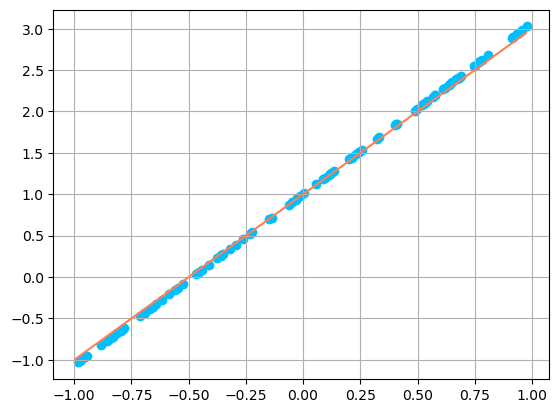

In [341]:
x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model.predict(x_predicted)
plt.scatter(x_predicted, y_predicted, color = 'deepskyblue')
plt.plot(x_valid, y_target, color = 'coral')
plt.grid(True)
plt.show()

### Exercise 11.1

In order to make practice with NN, explore how does the previous linear regression depend on the number of epochs, $N_{\mathrm{epochs}}$, the number of data points $N_{\mathrm{train}}$ and on the noise $\sigma$. Try to improve the previous result operating on these parameters.

1) Nepochs:
    Aumentare il numero di epoche dà la possibilità alla rete neurale di analizzare maggiori combinazioni di dati. 
    Un numero eccessivo di epoche tuttavia porta all'overfitting de dati.
    Variando il numero di epoche è possibile però riscontrare una variazione nella loss dei dati di validazione, l'epoca in corrispondenza del minimo di questo valore può essere presa come Nepochs ideale ai fini del procedimento.
    Per la regressione precedente $Nepochs=45$ è stato ritenuto abbastanza vicino al minimo di loss dei dati di validazione. 
    
2) Ntrain:
        Con una maggiore disponibilità di dati è possibile fare previsioni meno affette da rumore casuale.
        Tuttavia un numero maggiore di dati richiede un maggiore sforzo computazionale.
        Pochi dati portano a loss molto elevate e a previsioni non molto efficaci.
        Troppi dati portano ancora all'aumento della loss sui dati di training.
        Il numero di dati che è sembrato più adatto è $Ntrain=700$.

3) σ:
        La presenza di rumore influisce sull'accuratezza del modello. Più il rumore cresce, più è difficile per il modello fittare i dati. Ad un determinato livello di intensità di rumore è necessario quindi fornire un numero adeguato di dati che compensino il rumore.

### Exercise 11.2

Try to extend the model to obtain a reasonable fit of the following polynomial of order 3:

$$
f(x)=4-3x-2x^2+3x^3
$$
for $x \in [-1,1]$.

Find good (& reasonable) choices for:

- the number of layers
- the number of neurons in each layer
- the activation function
- the optimizer
- the loss function
  
Check your NN model by seeing how well your fits predict newly generated test data (including on data outside the range you fit. How well do your NN do on points in the range of $x$ where you trained the model? How about points outside the original training data set? 
Summarize what you have learned about the relationship between model complexity (number of parameters), goodness of fit on training data, and the ability to predict well.

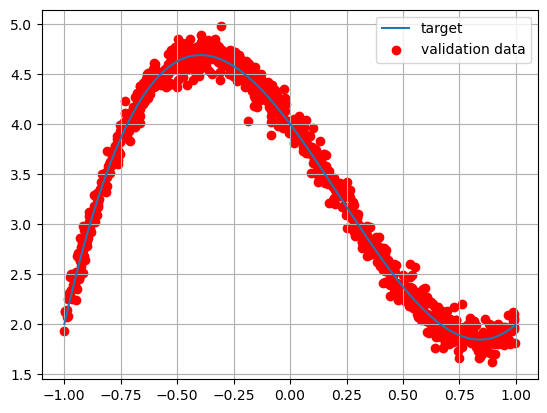

In [346]:
# target parameters of f(x) = a + bx + cx^2+dx^3
a = 4
b = -3
c = -2
d = 3

# generate training inputs
np.random.seed(0)
x_train2 = np.random.uniform(-1, 1, 10000)
x_valid2 = np.random.uniform(-1, 1, 1000)
x_valid2.sort()
y_target2 = a + b * x_valid2 + c * x_valid2 **2 + d * x_valid2**3 # ideal (target) linear function

sigma2 = 0.1 # noise standard deviation
y_train2 = np.random.normal(a + b * x_train2 + c * x_train2 **2 + d * x_train2**3, sigma2) # actual measures from which we want to guess regression parameters
y_valid2 = np.random.normal(y_target2, sigma2)

# plot validation and target dataset
import matplotlib.pyplot as plt
plt.plot(x_valid2, y_target2, label='target')
plt.scatter(x_valid2, y_valid2, color='r', label='validation data')
plt.legend()
plt.grid(True)
plt.show()

In [414]:
# Building the model
model1 = tf.keras.Sequential()
model1.add(Dense(units=45, input_shape = (1,), activation = 'relu'))
model1.add(Dense(units=45, input_shape = (1,), activation = 'relu'))
model1.add(Dense(units=45, input_shape = (1,), activation = 'relu'))
model1.add(Dense(units=1, input_shape = (1,)))

model2 = tf.keras.Sequential()
model2.add(Dense(units=45, input_shape = (1,), activation = 'relu'))
model2.add(Dense(units=45, input_shape = (1,), activation = 'relu'))
model2.add(Dense(units=1, input_shape = (1,)))

model3 = tf.keras.Sequential()
model3.add(Dense(units=70, input_shape = (1,), activation = 'relu'))
model3.add(Dense(units=1, input_shape = (1,)))

model4 = tf.keras.Sequential()
model4.add(Dense(units=70, input_shape = (1,), activation = 'tanh'))
model4.add(Dense(units=1, input_shape = (1,)))

model5 = tf.keras.Sequential()
model5.add(Dense(units=70, input_shape = (1,), activation = 'sigmoid'))
model5.add(Dense(units=1, input_shape = (1,)))

model6 = tf.keras.Sequential()
model6.add(Dense(units=45, input_shape = (1,), activation = 'tanh'))
model6.add(Dense(units=45, input_shape = (1,), activation = 'tanh'))
model6.add(Dense(units=45, input_shape = (1,), activation = 'tanh'))
model6.add(Dense(units=1, input_shape = (1,)))

# Compiling the model
model1.compile(optimizer='sgd', loss='mse', metrics=['mse'])
model2.compile(optimizer='sgd', loss='mse', metrics=['mse'])
model3.compile(optimizer='sgd', loss='mse', metrics=['mse'])
model4.compile(optimizer='sgd', loss='mse', metrics=['mse'])
model5.compile(optimizer='sgd', loss='mse', metrics=['mse'])
model6.compile(optimizer='sgd', loss='mse', metrics=['mse'])

# get a summary of our composed model
model1.summary()
model2.summary()
model3.summary()
model4.summary()
model5.summary()
model6.summary()

Model: "sequential_67"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_126 (Dense)           (None, 45)                90        
                                                                 
 dense_127 (Dense)           (None, 45)                2070      
                                                                 
 dense_128 (Dense)           (None, 45)                2070      
                                                                 
 dense_129 (Dense)           (None, 1)                 46        
                                                                 
Total params: 4,276
Trainable params: 4,276
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_68"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_130 (Dense)          

In [415]:
# fit the model using training dataset
# over 10 epochs of 32 batch size each
# report training progress against validation data
history1 = model1.fit(x=x_train2, y=y_train2, 
          batch_size=32, epochs=40,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid2, y_valid2))

history2 = model2.fit(x=x_train2, y=y_train2, 
          batch_size=32, epochs=40,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid2, y_valid2))


history3 = model3.fit(x=x_train2, y=y_train2, 
          batch_size=32, epochs=40,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid2, y_valid2))

history4 = model4.fit(x=x_train2, y=y_train2, 
          batch_size=32, epochs=40,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid2, y_valid2))

history5 = model5.fit(x=x_train2, y=y_train2, 
          batch_size=32, epochs=40,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid2, y_valid2))

history6 = model6.fit(x=x_train2, y=y_train2, 
          batch_size=32, epochs=40,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid2, y_valid2))

Epoch 1/40
313/313 [==============================] - 1s 1ms/step - loss: 0.8600 - mse: 0.8600 - val_loss: 0.2056 - val_mse: 0.2056
Epoch 2/40
313/313 [==============================] - 0s 1ms/step - loss: 0.1054 - mse: 0.1054 - val_loss: 0.0475 - val_mse: 0.0475
Epoch 3/40
313/313 [==============================] - 0s 1ms/step - loss: 0.0337 - mse: 0.0337 - val_loss: 0.0240 - val_mse: 0.0240
Epoch 4/40
313/313 [==============================] - 0s 1ms/step - loss: 0.0195 - mse: 0.0195 - val_loss: 0.0157 - val_mse: 0.0157
Epoch 5/40
313/313 [==============================] - 0s 1ms/step - loss: 0.0151 - mse: 0.0151 - val_loss: 0.0139 - val_mse: 0.0139
Epoch 6/40
313/313 [==============================] - 0s 1ms/step - loss: 0.0135 - mse: 0.0135 - val_loss: 0.0133 - val_mse: 0.0133
Epoch 7/40
313/313 [==============================] - 0s 1ms/step - loss: 0.0128 - mse: 0.0128 - val_loss: 0.0121 - val_mse: 0.0121
Epoch 8/40
313/313 [==============================] - 0s 1ms/step - loss: 0.

Epoch 23/40
313/313 [==============================] - 0s 1ms/step - loss: 0.0122 - mse: 0.0122 - val_loss: 0.0118 - val_mse: 0.0118
Epoch 24/40
313/313 [==============================] - 0s 987us/step - loss: 0.0120 - mse: 0.0120 - val_loss: 0.0119 - val_mse: 0.0119
Epoch 25/40
313/313 [==============================] - 0s 1ms/step - loss: 0.0119 - mse: 0.0119 - val_loss: 0.0117 - val_mse: 0.0117
Epoch 26/40
313/313 [==============================] - 0s 1ms/step - loss: 0.0119 - mse: 0.0119 - val_loss: 0.0117 - val_mse: 0.0117
Epoch 27/40
313/313 [==============================] - 0s 1ms/step - loss: 0.0117 - mse: 0.0117 - val_loss: 0.0115 - val_mse: 0.0115
Epoch 28/40
313/313 [==============================] - 0s 1ms/step - loss: 0.0117 - mse: 0.0117 - val_loss: 0.0120 - val_mse: 0.0120
Epoch 29/40
313/313 [==============================] - 0s 1ms/step - loss: 0.0116 - mse: 0.0116 - val_loss: 0.0122 - val_mse: 0.0122
Epoch 30/40
313/313 [==============================] - 0s 990us/ste

313/313 [==============================] - 0s 1ms/step - loss: 0.5346 - mse: 0.5346 - val_loss: 0.5290 - val_mse: 0.5290
Epoch 26/40
313/313 [==============================] - 0s 1ms/step - loss: 0.5240 - mse: 0.5240 - val_loss: 0.5184 - val_mse: 0.5184
Epoch 27/40
313/313 [==============================] - 0s 970us/step - loss: 0.5137 - mse: 0.5137 - val_loss: 0.5252 - val_mse: 0.5252
Epoch 28/40
313/313 [==============================] - 0s 992us/step - loss: 0.5022 - mse: 0.5022 - val_loss: 0.5015 - val_mse: 0.5015
Epoch 29/40
313/313 [==============================] - 0s 1ms/step - loss: 0.4869 - mse: 0.4869 - val_loss: 0.4820 - val_mse: 0.4820
Epoch 30/40
313/313 [==============================] - 0s 995us/step - loss: 0.4726 - mse: 0.4726 - val_loss: 0.4631 - val_mse: 0.4631
Epoch 31/40
313/313 [==============================] - 0s 998us/step - loss: 0.4567 - mse: 0.4567 - val_loss: 0.4545 - val_mse: 0.4545
Epoch 32/40
313/313 [==============================] - 0s 1ms/step - loss

In [416]:
# evaluate model
score1 = model1.evaluate(x_valid2, y_valid2, batch_size=50, verbose=1)
score2 = model2.evaluate(x_valid2, y_valid2, batch_size=50, verbose=1)
score3 = model3.evaluate(x_valid2, y_valid2, batch_size=50, verbose=1)
score4 = model4.evaluate(x_valid2, y_valid2, batch_size=50, verbose=1)
score5 = model5.evaluate(x_valid2, y_valid2, batch_size=50, verbose=1)
score6 = model6.evaluate(x_valid2, y_valid2, batch_size=50, verbose=1)

# print performance
print('Model 1:')
print('Test loss:', score1[0])
print('Test accuracy:', score1[1])

print('Model 2:')
print('Test loss:', score2[0])
print('Test accuracy:', score2[1])

print('Model 3:')
print('Test loss:', score3[0])
print('Test accuracy:', score3[1])

print('Model 4:')
print('Test loss:', score4[0])
print('Test accuracy:', score4[1])

print('Model 5:')
print('Test loss:', score5[0])
print('Test accuracy:', score5[1])

print('Model 6:')
print('Test loss:', score6[0])
print('Test accuracy:', score6[1])

20/20 [==============================] - 0s 1ms/step - loss: 0.0110 - mse: 0.0110
Model 1:
Test loss: 0.01043590996414423
Test accuracy: 0.01043590996414423
Model 2:
Test loss: 0.011292489245533943
Test accuracy: 0.011292489245533943
Model 3:
Test loss: 0.01877710409462452
Test accuracy: 0.01877710409462452
Model 4:
Test loss: 0.01986701972782612
Test accuracy: 0.01986701972782612
Model 5:
Test loss: 0.29651695489883423
Test accuracy: 0.29651695489883423
Model 6:
Test loss: 0.010980566032230854
Test accuracy: 0.010980566032230854


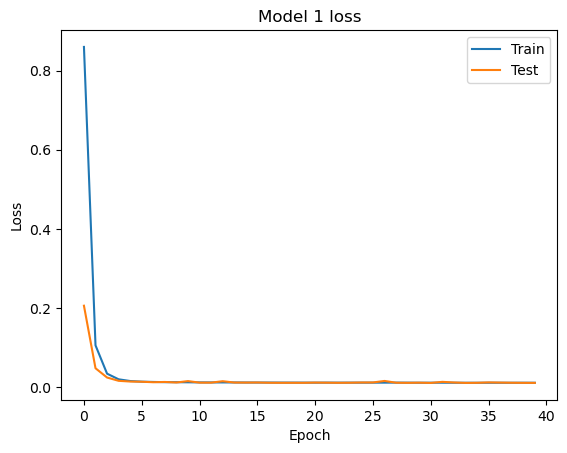

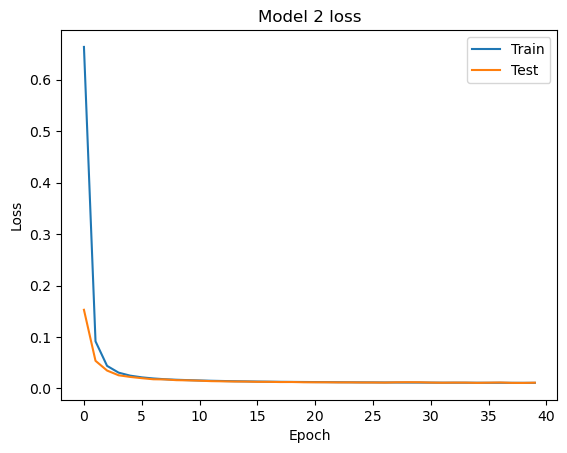

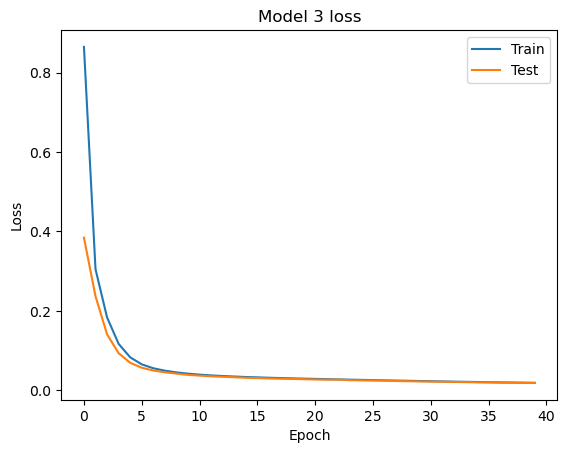

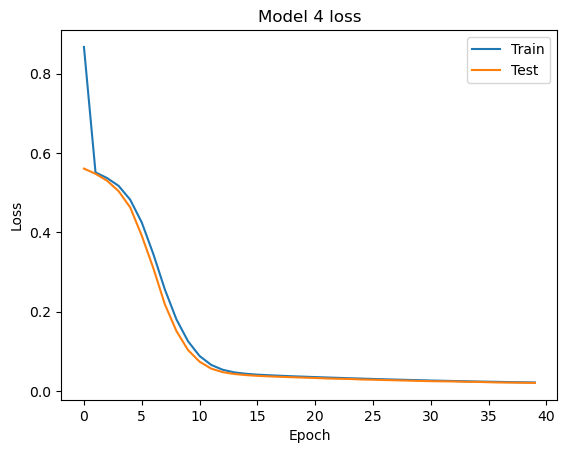

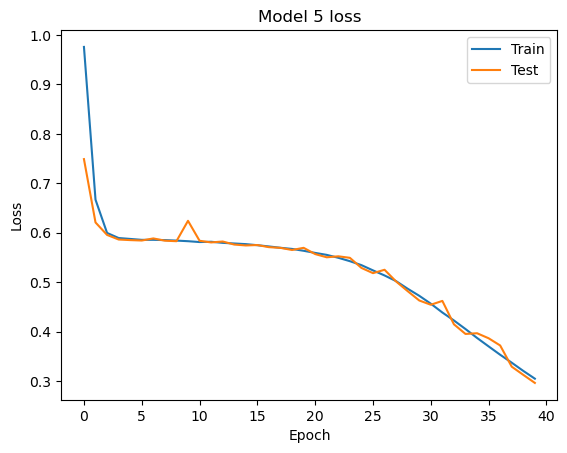

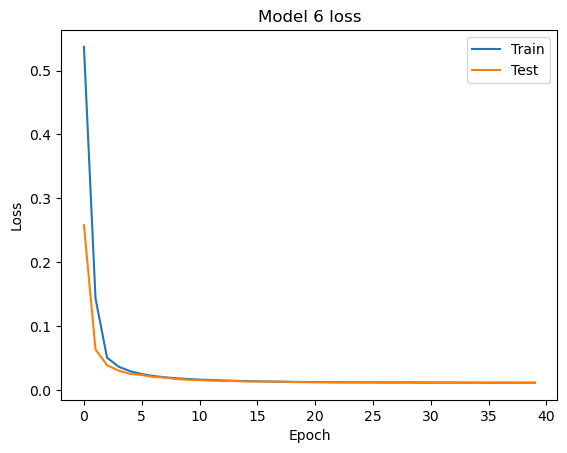

In [417]:
# look into training history
# Plot training & validation loss values
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('Model 1 loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('Model 2 loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('Model 3 loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

plt.plot(history4.history['loss'])
plt.plot(history4.history['val_loss'])
plt.title('Model 4 loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

plt.plot(history5.history['loss'])
plt.plot(history5.history['val_loss'])
plt.title('Model 5 loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

plt.plot(history6.history['loss'])
plt.plot(history6.history['val_loss'])
plt.title('Model 6 loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

4/4 [==============================] - 0s 1ms/step


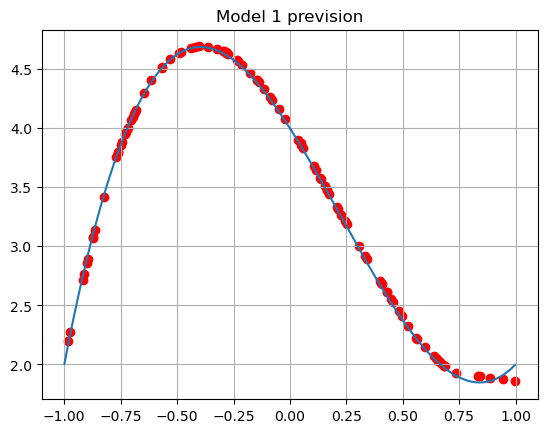

4/4 [==============================] - 0s 1ms/step


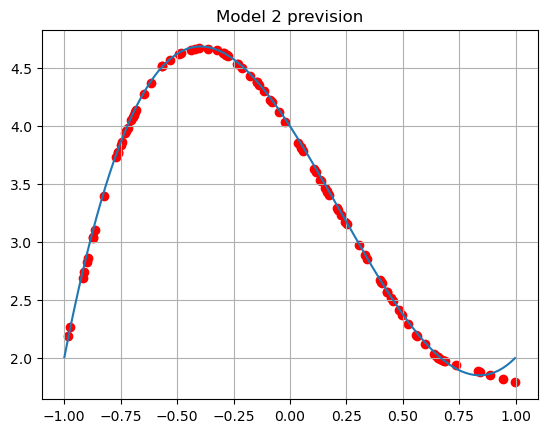

4/4 [==============================] - 0s 1ms/step


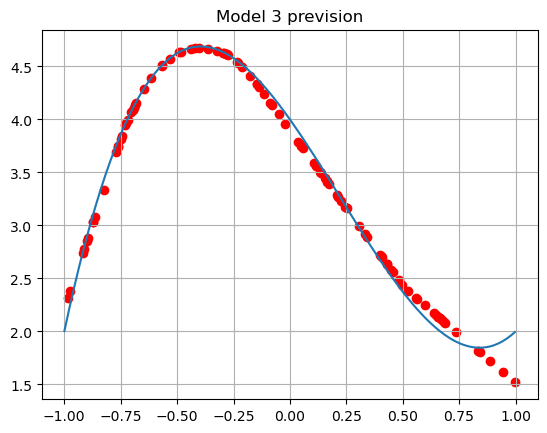

4/4 [==============================] - 0s 1ms/step


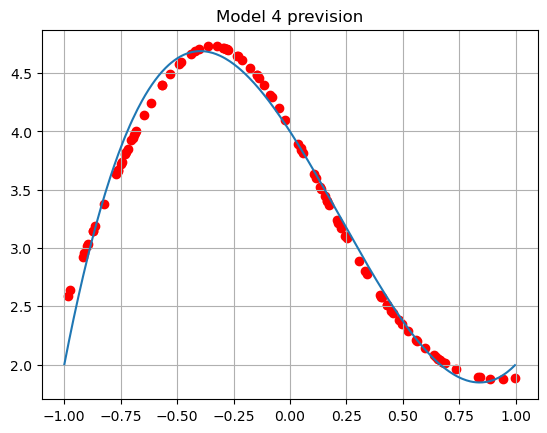

4/4 [==============================] - 0s 1ms/step


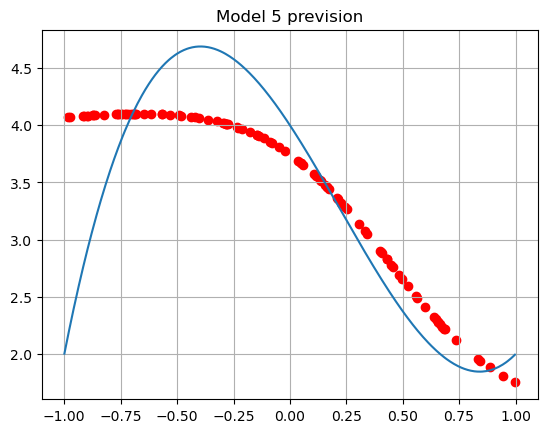

4/4 [==============================] - 0s 1ms/step


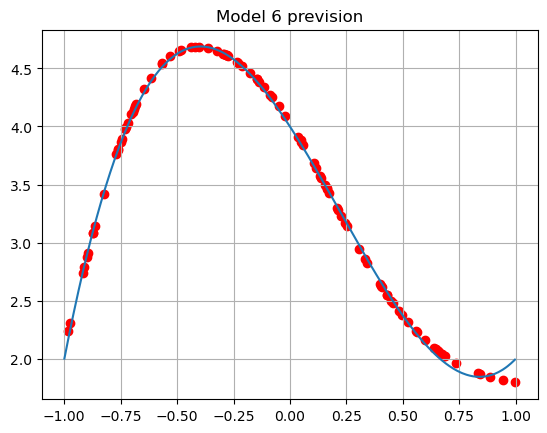

In [419]:
x_predicted = np.random.uniform(-1, 1, 100)

y_predicted = model1.predict(x_predicted)
plt.scatter(x_predicted, y_predicted,color='r')
plt.plot(x_valid2, y_target2)
plt.grid(True)
plt.title('Model 1 prevision')
plt.show()

y_predicted = model2.predict(x_predicted)
plt.scatter(x_predicted, y_predicted,color='r')
plt.plot(x_valid2, y_target2)
plt.grid(True)
plt.title('Model 2 prevision')
plt.show()

y_predicted = model3.predict(x_predicted)
plt.scatter(x_predicted, y_predicted,color='r')
plt.plot(x_valid2, y_target2)
plt.grid(True)
plt.title('Model 3 prevision')
plt.show()

y_predicted = model4.predict(x_predicted)
plt.scatter(x_predicted, y_predicted,color='r')
plt.plot(x_valid2, y_target2)
plt.grid(True)
plt.title('Model 4 prevision')
plt.show()

y_predicted = model5.predict(x_predicted)
plt.scatter(x_predicted, y_predicted,color='r')
plt.plot(x_valid2, y_target2)
plt.grid(True)
plt.title('Model 5 prevision')
plt.show()

y_predicted = model6.predict(x_predicted)
plt.scatter(x_predicted, y_predicted,color='r')
plt.plot(x_valid2, y_target2)
plt.grid(True)
plt.title('Model 6 prevision')
plt.show()

7/7 [==============================] - 0s 1ms/step


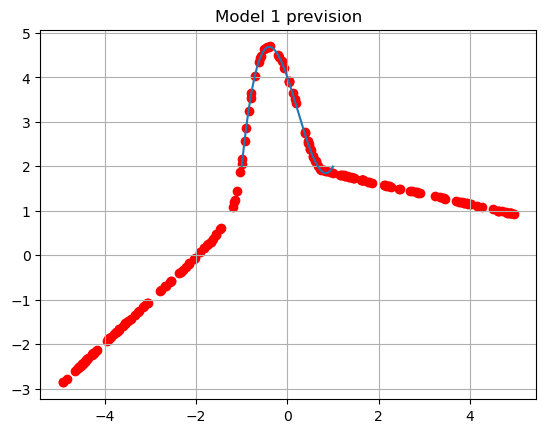

7/7 [==============================] - 0s 1ms/step


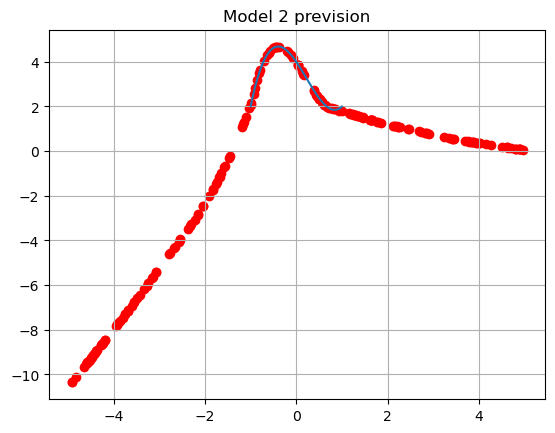

7/7 [==============================] - 0s 979us/step


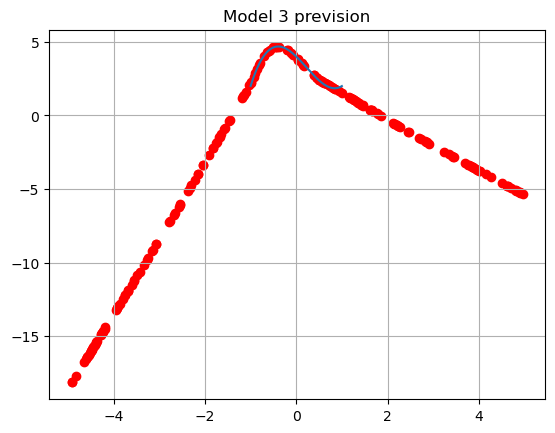

7/7 [==============================] - 0s 1ms/step


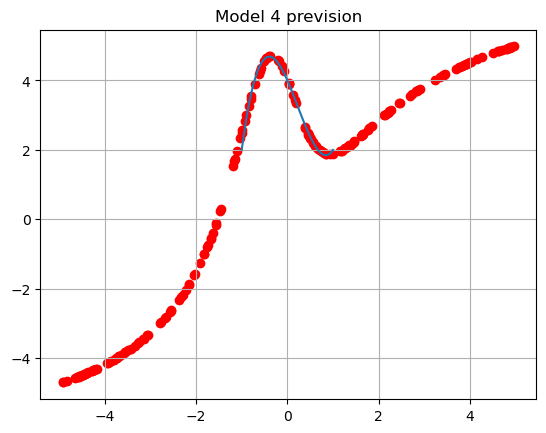

7/7 [==============================] - 0s 1ms/step


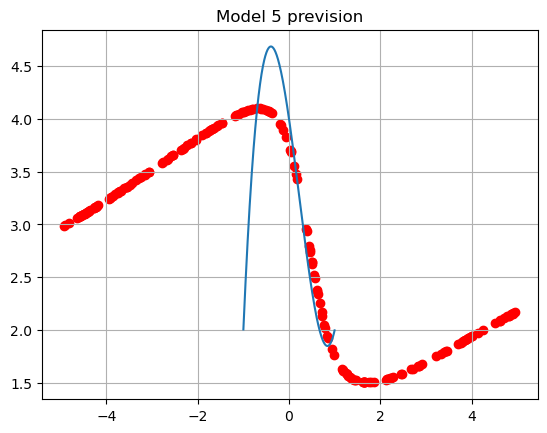

7/7 [==============================] - 0s 1ms/step


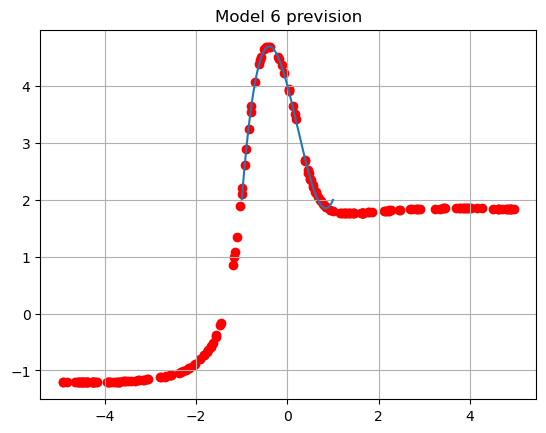

In [422]:
x_predicted = np.random.uniform(-5, 5, 200)

y_predicted = model1.predict(x_predicted)
plt.scatter(x_predicted, y_predicted,color='r')
plt.plot(x_valid2, y_target2)
plt.grid(True)
plt.title('Model 1 prevision')
plt.show()

y_predicted = model2.predict(x_predicted)
plt.scatter(x_predicted, y_predicted,color='r')
plt.plot(x_valid2, y_target2)
plt.grid(True)
plt.title('Model 2 prevision')
plt.show()


y_predicted = model3.predict(x_predicted)
plt.scatter(x_predicted, y_predicted,color='r')
plt.plot(x_valid2, y_target2)
plt.grid(True)
plt.title('Model 3 prevision')
plt.show()


y_predicted = model4.predict(x_predicted)
plt.scatter(x_predicted, y_predicted,color='r')
plt.plot(x_valid2, y_target2)
plt.grid(True)
plt.title('Model 4 prevision')
plt.show()


y_predicted = model5.predict(x_predicted)
plt.scatter(x_predicted, y_predicted,color='r')
plt.plot(x_valid2, y_target2)
plt.grid(True)
plt.title('Model 5 prevision')
plt.show()

y_predicted = model6.predict(x_predicted)
plt.scatter(x_predicted, y_predicted,color='r')
plt.plot(x_valid2, y_target2)
plt.grid(True)
plt.title('Model 6 prevision')
plt.show()

### Exercise 11.3
  
Try to extend the model to fit a simple trigonometric 2D function such as $f(x,y) = \sin(x^2+y^2)$ in the range $x \in [-3/2,3/2]$ and $y \in [-3/2,3/2]$.

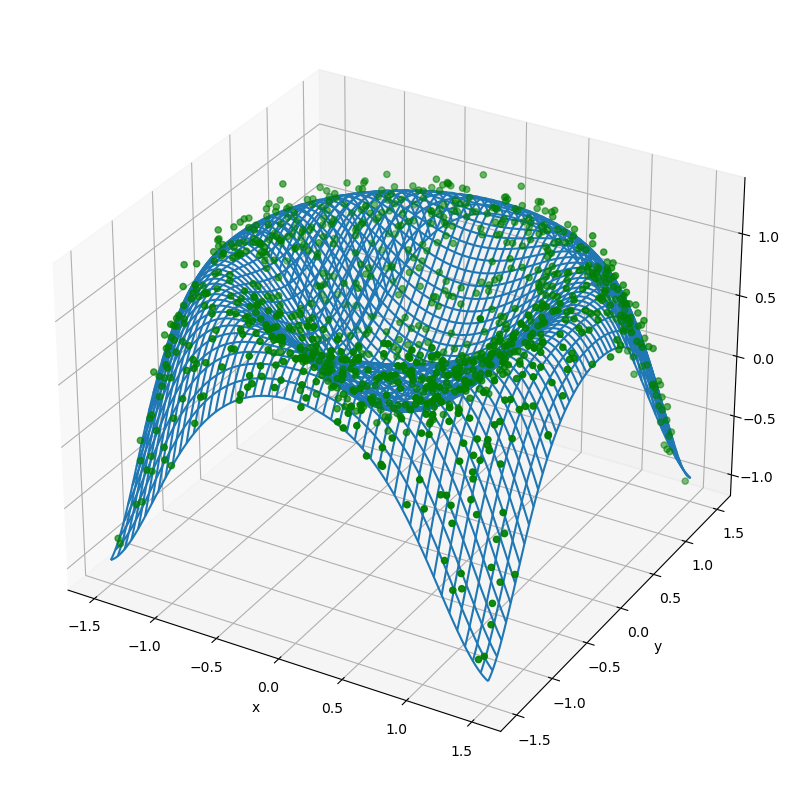

In [461]:
from mpl_toolkits.mplot3d import Axes3D

# generate training inputs
np.random.seed(0)

fig = plt.figure(figsize=(10,10))

x_graph = np.linspace(-1.5, 1.5, 1000)
y_graph = np.linspace(-1.5, 1.5, 1000)
X, Y = np.meshgrid(x_graph, y_graph)


data_train = np.random.uniform(-1.5, 1.5, size=(50000,2))
data_valid = np.random.uniform(-1.5, 1.5, size=(1000,2))

z_target = np.sin(X**2+ Y**2) # ideal (target)function

sigma = 0.1

z_train = np.random.normal(np.sin(data_train[:,0]**2 + data_train[:,1]**2), sigma) # actual measures from which we want to guess regression parameters, in particolare un estrazione gaussiana con sigma 0.3 intorno all'estrazione
z_valid = np.random.normal(np.sin(data_valid[:,0]**2 + data_valid[:,1]**2), sigma) 

ax = fig.add_subplot(111, projection='3d')
ax.scatter(data_valid[:,0],data_valid[:,1], z_valid, label='validation points', color='green')
ax.plot_wireframe(X, Y, z_target, cmap='viridis')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

plt.show()

In [445]:
model7 = tf.keras.Sequential()
model7.add(Dense(units=45, input_shape = (2,), activation = 'tanh'))
model7.add(Dense(units=45, activation = 'tanh'))
model7.add(Dense(units=45, activation = 'tanh'))
model7.add(Dense(units=1))

model7.compile(optimizer='sgd', loss='mse', metrics=['mse'])

model7.summary()

Model: "sequential_76"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_155 (Dense)           (None, 45)                135       
                                                                 
 dense_156 (Dense)           (None, 45)                2070      
                                                                 
 dense_157 (Dense)           (None, 45)                2070      
                                                                 
 dense_158 (Dense)           (None, 1)                 46        
                                                                 
Total params: 4,321
Trainable params: 4,321
Non-trainable params: 0
_________________________________________________________________


In [446]:
history7 = model7.fit(x=data_train, y=z_train, 
          batch_size=32, epochs=40,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(data_valid, z_valid))

Epoch 1/40
1563/1563 [==============================] - 2s 1ms/step - loss: 0.1574 - mse: 0.1574 - val_loss: 0.1462 - val_mse: 0.1462
Epoch 2/40
1563/1563 [==============================] - 1s 948us/step - loss: 0.1539 - mse: 0.1539 - val_loss: 0.1422 - val_mse: 0.1422
Epoch 3/40
1563/1563 [==============================] - 1s 956us/step - loss: 0.1442 - mse: 0.1442 - val_loss: 0.1313 - val_mse: 0.1313
Epoch 4/40
1563/1563 [==============================] - 2s 1ms/step - loss: 0.1246 - mse: 0.1246 - val_loss: 0.1091 - val_mse: 0.1091
Epoch 5/40
1563/1563 [==============================] - 2s 987us/step - loss: 0.1147 - mse: 0.1147 - val_loss: 0.1030 - val_mse: 0.1030
Epoch 6/40
1563/1563 [==============================] - 2s 1ms/step - loss: 0.1097 - mse: 0.1097 - val_loss: 0.1039 - val_mse: 0.1039
Epoch 7/40
1563/1563 [==============================] - 2s 1ms/step - loss: 0.1049 - mse: 0.1049 - val_loss: 0.0979 - val_mse: 0.0979
Epoch 8/40
1563/1563 [==============================] - 

In [448]:
score7 = model7.evaluate(data_valid, z_valid, batch_size=50, verbose=1)

print('Model 7:')
print('Test loss:', score7[0])
print('Test accuracy:', score7[1])

20/20 [==============================] - 0s 1ms/step - loss: 0.0121 - mse: 0.0121
Model 7:
Test loss: 0.012089082971215248
Test accuracy: 0.012089082039892673


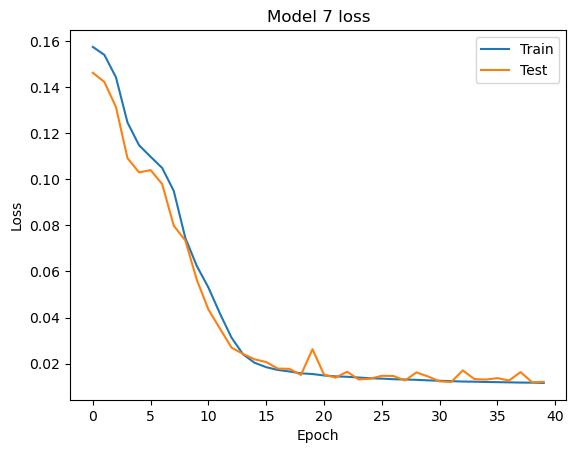

In [449]:
plt.plot(history7.history['loss'])
plt.plot(history7.history['val_loss'])
plt.title('Model 7 loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

32/32 [==============================] - 0s 973us/step


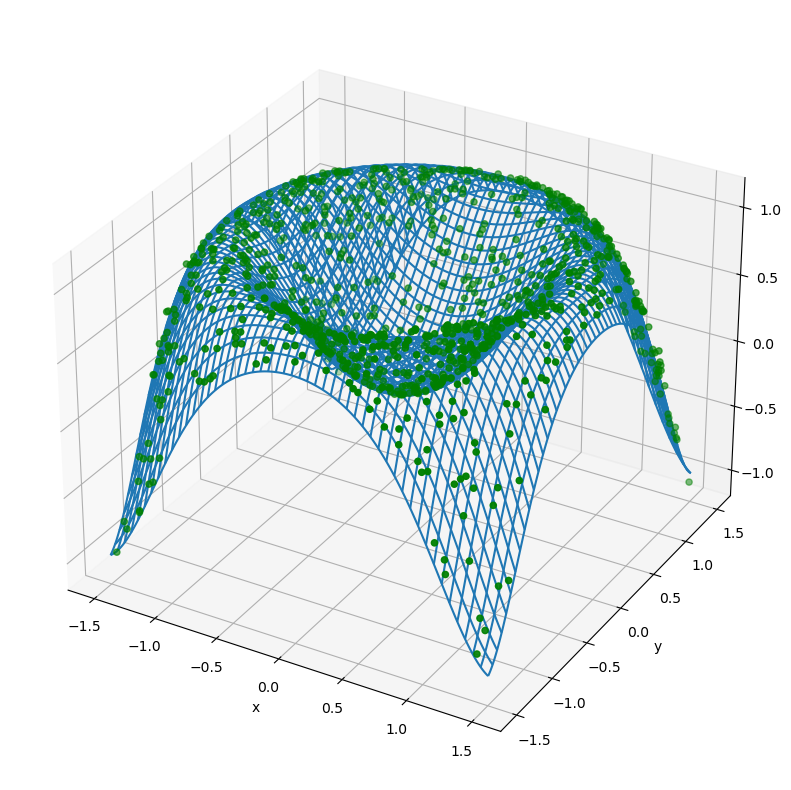

In [462]:
data_predicted = np.random.uniform(-1.5, 1.5, size=(1000,2))

z_predicted = model7.predict(data_predicted)

fig = plt.figure(figsize=(10,10))

ax = fig.add_subplot(111, projection='3d')
ax.scatter(data_predicted[:,0],data_predicted[:,1], z_predicted,color='green')
ax.plot_wireframe(X, Y, z_target, cmap='viridis')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

plt.show()

Ideas to meditate on these exercises and judge your results can be found <a href=https://xkcd.com/2048/>here</a>